# Employee Attrition Analysis — 03: Exploratory Data Analysis

***Understanding patterns and distributions in the cleaned dataset to inform modeling strategy***

**Author:** Katherine Ygbuhay  
**Updated:** 2025-10-04  
**Stage:** 03 — Exploratory Data Analysis  
**Runtime:** ~20 minutes  

## Objective

Explore the cleaned HR attrition dataset to identify patterns, trends, and relationships between variables that will inform feature engineering and model selection.

## Scope & Approach

- **Descriptive statistics** across all variables with focus on target class balance
- **Categorical analysis** of department and salary distributions  
- **Visual exploration** through histograms, boxplots, and correlation heatmaps
- **Pattern identification** for variables strongly associated with attrition

## Key Outputs

- EDA summary with key findings in `docs/notes/eda_summary.md`
- Correlation analysis revealing feature relationships
- Visual documentation of distributions and target patterns
- Data quality assessment confirming modeling readiness

## Prerequisites

- Cleaned employee dataset from `02_data_cleaning.ipynb`
- Data dictionary understanding from previous stage
- Visualization utilities from project's `src/viz_helpers`

---

## 1. Imports & Setup

In [1]:
import os
os.environ["PORTFOLIO_PROJECT"] = "employee_attrition_analysis"

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from src.bootstrap import setup_notebook
from src.viz_helpers import (
    pretty_label, adjust_xtick_labels, barplot_counts,
    hist_grid, boxplot_by_target, apply_plot_rc_defaults)

RAW_NAME  = "salifort_employee_attrition_raw.csv"
PROC_NAME = "salifort_employee_attrition_cleaned.csv"

P, df = setup_notebook(raw_filename=RAW_NAME, proc_filename=PROC_NAME, load="proc")
apply_plot_rc_defaults()   # bump font sizes once (before any plot)

🎨 Accessibility defaults applied (colorblind palette, high-contrast, safe colormap).
✅ Accessibility defaults applied
📁 Project root → /home/admin/Documents/portfolio/coursework/google-advanced-data-analytics/employee_attrition_analysis
✅ Loaded PROC: data/processed/salifort_employee_attrition_cleaned.csv | shape=(14999, 11)


## 2. Schema Confirmation

In [2]:
print(f"✅ {P.PROC.relative_to(P.ROOT)} | shape={df.shape}")
df.info()

✅ data/processed/salifort_employee_attrition_cleaned.csv | shape=(14999, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  salary_level           14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


## 3. Descriptive Statistics

In [3]:
# Numeric feature summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612760,0.248517,0.09,0.44,0.64,0.82,0.99
last_evaluation,14999.0,0.716252,0.170873,0.39,0.56,0.72,0.87,1.00
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.00
average_montly_hours,14999.0,201.034802,49.771459,104.00,156.00,200.00,245.00,301.00
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.00
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.00
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.00
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.00
salary_level,14999.0,0.594706,0.637183,0.00,0.00,1.00,1.00,2.00


## 4. Target Class Balance

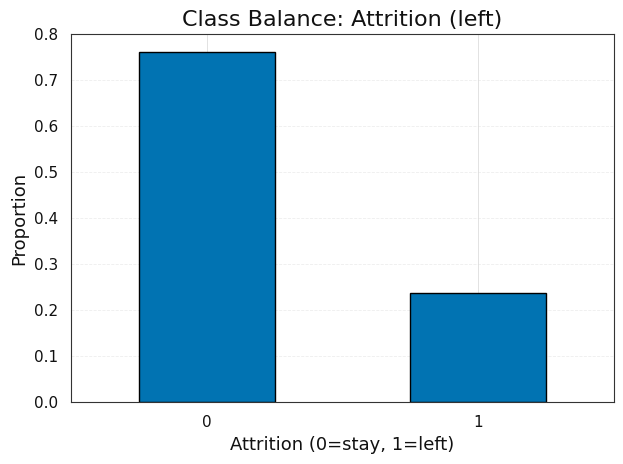

In [4]:
# Distribution of attrition target
ax = barplot_counts(df["left"], "Class Balance: Attrition (left)")
plt.xlabel("Attrition (0=stay, 1=left)"); plt.show()

## 5. Categorical Breakdowns

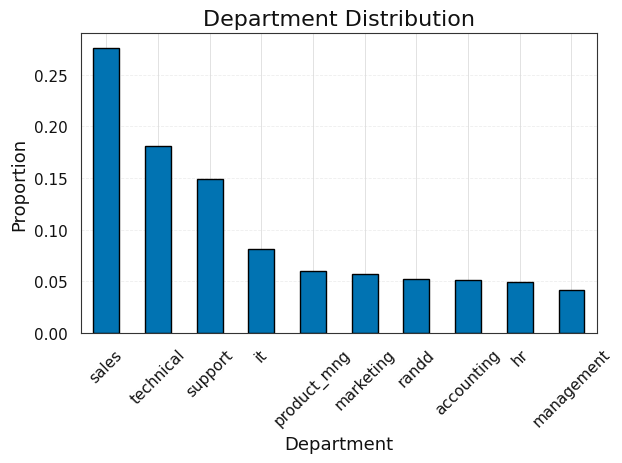

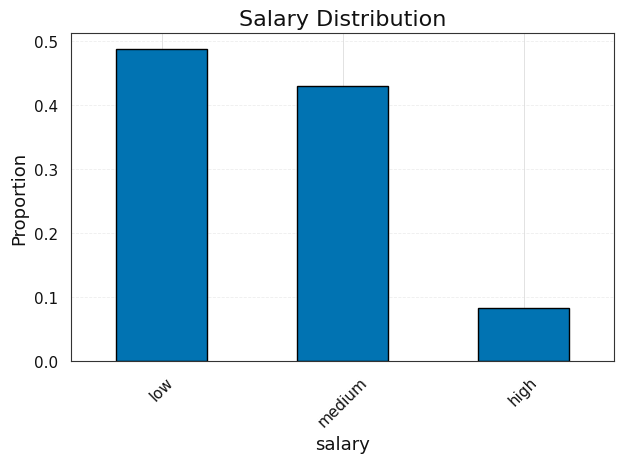

In [5]:
# Resolve column names whether raw or encoded
dept_col = "department" if "department" in df.columns else ("Department" if "Department" in df.columns else "department_code")
sal_col  = "salary"     if "salary" in df.columns     else "salary_level"

barplot_counts(df[dept_col], "Department Distribution"); plt.show()
barplot_counts(df[sal_col],  "Salary Distribution");     plt.show()

## 6. Visualizations

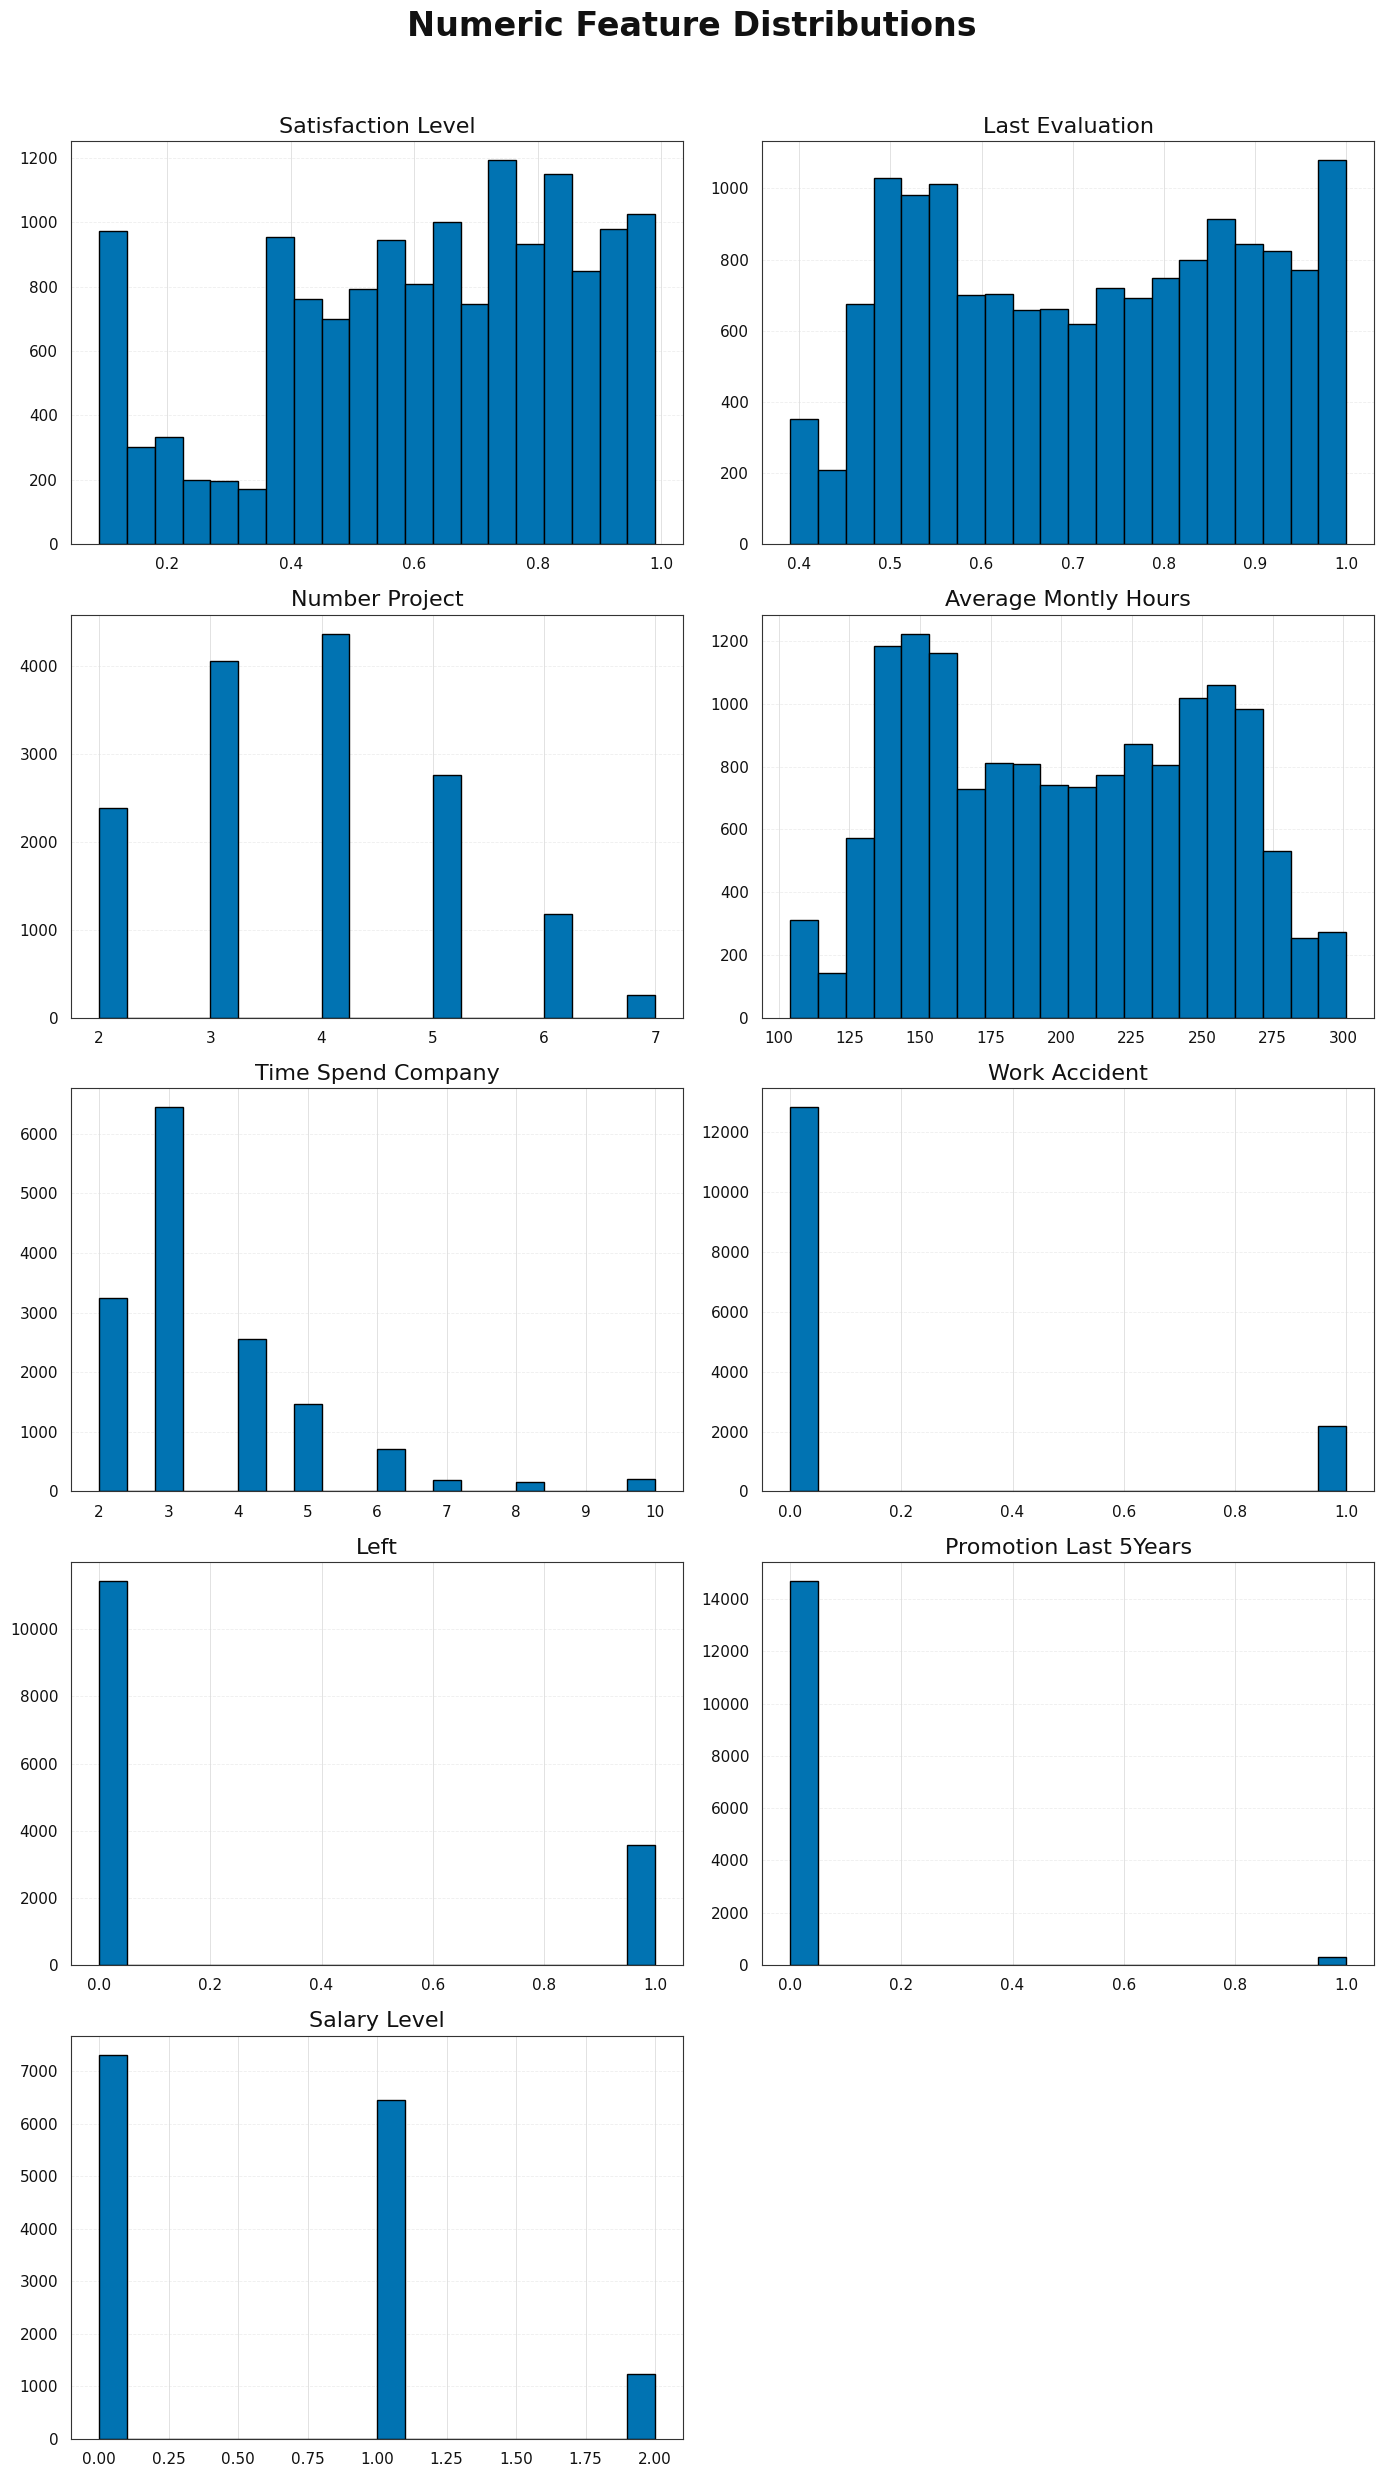

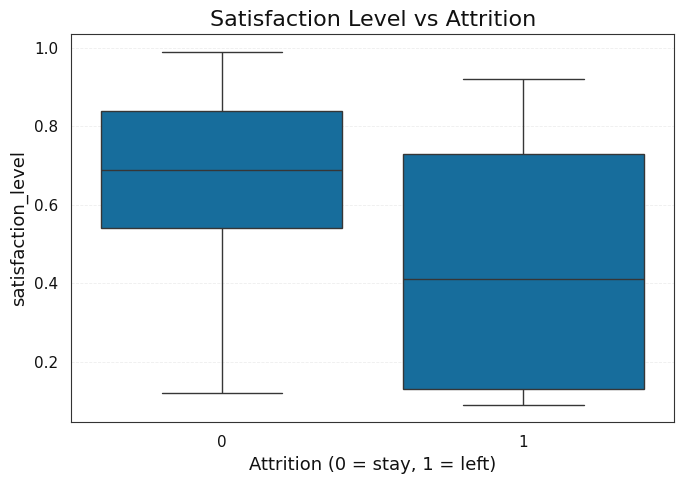

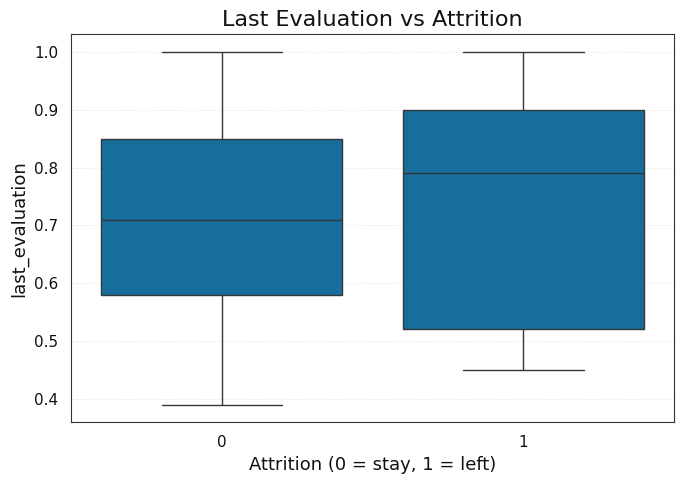

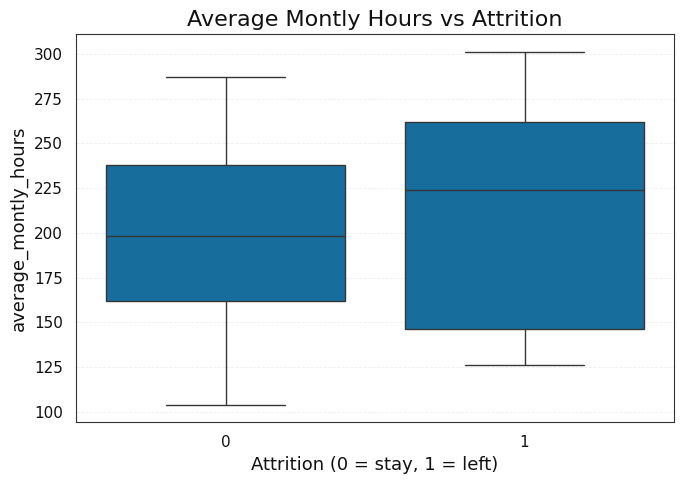

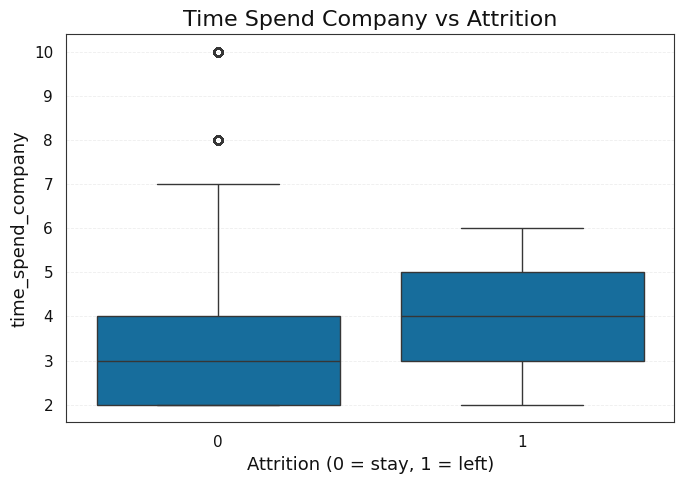

In [6]:
hist_grid(df)  # 2 per row, big suptitle, Title Case subplot titles

boxplot_by_target(
    df,
    feature_cols=["satisfaction_level", "last_evaluation", "average_montly_hours", "time_spend_company"],
    target="left"
)

## 7. Correlation Heatmap

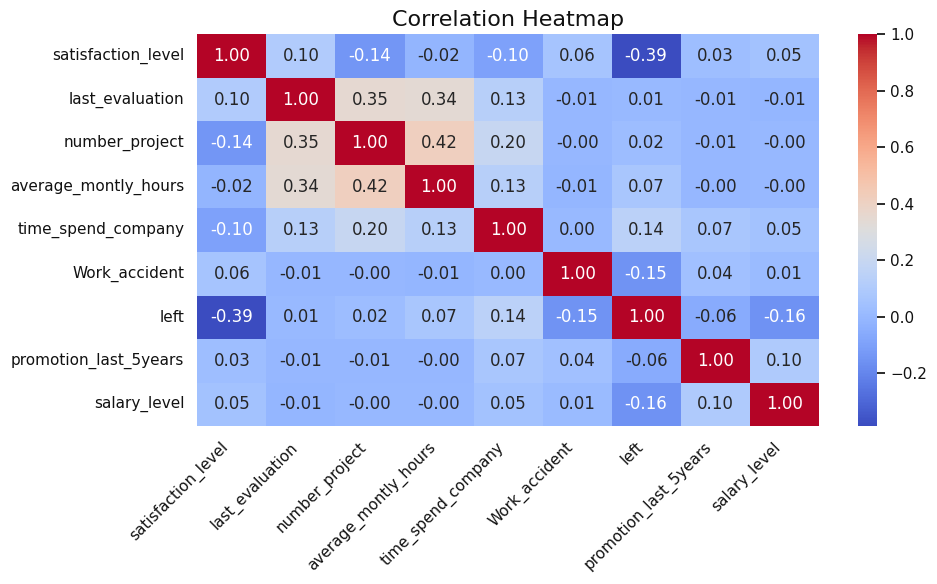

In [7]:
from src.viz_helpers import adjust_heatmap_labels

plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
ax = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
adjust_heatmap_labels(ax, rotation_x=45, rotation_y=0)  # <<< here
plt.tight_layout()
plt.show()

## 8. Save Notes & Assessment Check

In [8]:
from src.bootstrap import write_notes

notes_md = "\n".join([
    "# EDA Summary",
    f"- Dataset: {df.shape[0]} rows × {df.shape[1]} cols",
    "- Class balance: checked",
    "- Department & salary distributions: plotted",
    "- Numeric distributions: histograms + boxplots",
    "- Correlations: heatmap",
])

write_notes(P, "eda_summary.md", notes_md)

# Assessment
checks = {
    "processed_exists": P.PROC.exists(),
    "no_missing": int(df.isna().sum().sum()) == 0,
}
print("Checks:", checks)
assert all(checks.values()), "❌ Assessment failed."
print("✅ Assessment passed: dataset representative, high-quality, minimal missingness.")

📝 Wrote notes → docs/notes/eda_summary.md
Checks: {'processed_exists': True, 'no_missing': True}
✅ Assessment passed: dataset representative, high-quality, minimal missingness.


---

## EDA Summary

- **Dataset:** 14,999 rows × 11 columns (processed). :contentReference[oaicite:0]{index=0}
- **Missingness:** None detected in the processed dataset.
- **Class Balance (`left`):** Imbalanced toward **0 = stay**; proceed with metrics beyond accuracy (e.g., recall/PR AUC).
- **Categorical Distributions:** 
  - **Department:** Sales is the largest; others (technical, support, IT, etc.) follow with smaller shares.
  - **Salary:** Skewed toward **low** and **medium** bands; few **high**.
- **Numeric Distributions:** Clear spread across satisfaction, evaluation, monthly hours, tenure; no extreme collinearity observed.
- **By-Attrition Patterns (boxplots):** Leavers tend to show **lower satisfaction**; other features show differences worth validating in modeling.
- **Correlations:** No severe multicollinearity among numeric features; proceed safely with linear and tree-based baselines.
- **Artifacts:** Notes saved to `docs/notes/eda_summary.md`; figures rendered inline.